# Analysis of Restaurant Performance

As one of the most challenging industries, restaurants face intense competition and a growing demand from customers. There are several key factors that contribute to the success of a restaurant, such as its cuisine and location. This notebook aims to examine different variables that influence restaurant performance by building a predictive algorithm. Following the principles of LIME (Local Interpretable Model-agnostic Explanations), we strive to make the analysis accessible and user-friendly for readers.

## Table of Contents
1. Environment Setup
   * Importing Libraries
   * Loading the Data
2. Initial Assessment
   * Overview
   * Descriptive Statistics
3. Data Processing
   * Basic Cleanup
   * Missing Values
   * Outlier Detection
4. Feature Engineering
   * Working with Date and Time Variables
   * Handling Outliers - Feature Scaling
   * Categorical Encoding
5. Correlation Analysis
6. Models
   * Linear Regression
   * KNN
   * Random Forest
   * LDA
   * SVM
   * Decision Tree
   * Naive Bayes
   * Clustering  (Extra)
7. Model Evaluation
   * Model Comparison
   * Model Evaluation


# 1. Environment Set-up

In [171]:
## Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import random
random.seed(1234)
import time
import re

# Statiscal methods
from math import sqrt
from scipy import stats

# Manipulating & Visualizing Data
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.impute import SimpleImputer as imp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

# Categorical Encoding
import category_encoders as ce

# Feature Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# # Sampling Methods
# from imblearn.over_sampling import SMOTE, RandomOverSampler
# from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Dimensionality Reduction
from sklearn.decomposition import PCA, TruncatedSVD

# ML Models
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Performance metrics
import sklearn.metrics as skm

In [172]:
raw_data = pd.read_csv('./train.csv')
raw_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


# 2. Initial Diagnostics

In [173]:
# General info on the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [174]:
raw_data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


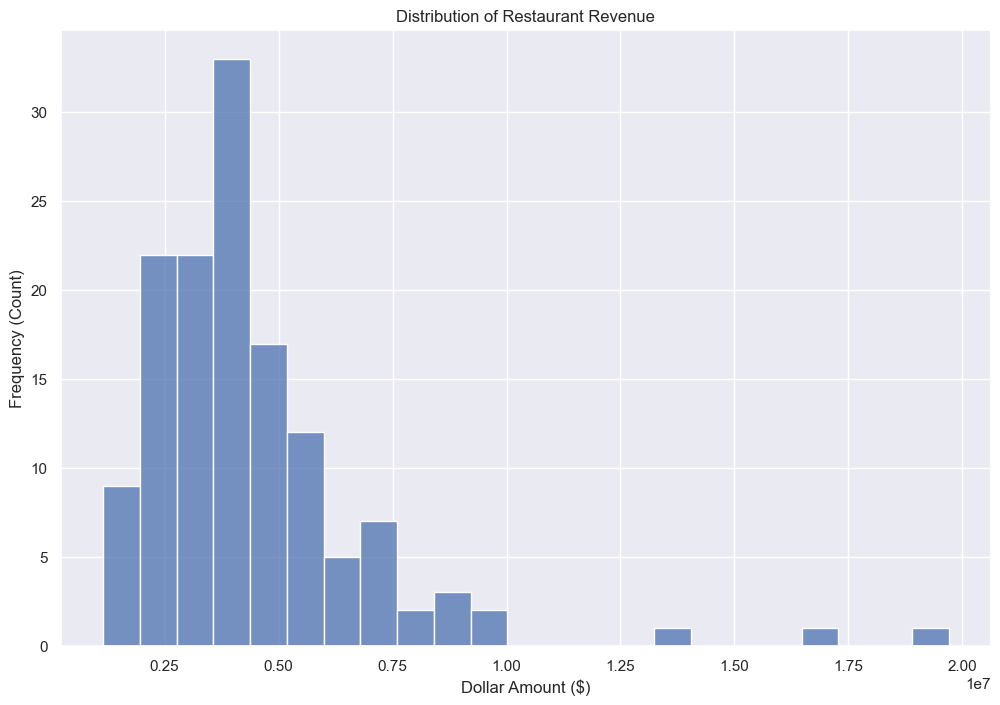

In [175]:
## Feature Variable Analysis
sns.histplot(data=raw_data, x='revenue')
plt.xlabel("Dollar Amount ($)")
plt.ylabel("Frequency (Count)")
plt.title("Distribution of Restaurant Revenue")
plt.show()

**Takeaway:** From the histogram above, we can deduct that restaurant revenue in this dataset have a right-skewed distribution with outliers on the upper end, indicating some business with higher revenues than others making on average ~USD 4.4M. The lowest revenues stands in the range between ~USD 1.15MM and ~USD 19.7MM.

# 3. Data Processing

In [176]:
## Simple processing steps
def basic_processing(data, col_drop = [], col_rename=dict()):
    """ Basic data processing: drop/rename columns, remove duplicate(s)
    
    Parameters
    ----------
    data : dataframe
        A dataset
    col_drop : list
        A list of column names to drop
    col_rename : dict
        A dictionary pairing the old and new column names desired

    Returns
    -------
    data
        a modified dataframe
    """ 
    #Drop the 'Serial No.' column
    if len(col_drop) > 0:
        data.drop(col_drop, axis=1, inplace=True)

    # Renaming the target variable and one predictor
    if col_rename:
        data.rename(columns=col_rename, inplace=True)
    
    # Removing any Duplicate Observations if any
    data.drop_duplicates(keep='first', inplace=True)
    return data

In [177]:
df = basic_processing(raw_data, col_rename={"revenue": "target"})
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,target
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [178]:
# Identify missing values and dealing with them if present
def identify_missing_val(data):
    """ Identify missing/na values
    
    Parameters
    ----------
    data : dataframe
        A dataset

    Returns
    -------
    data
        a dataframe with no missing values 
        either after imputation or original format
    """
    
    # Count number of missing values 
    sum_na = data.isnull().sum().sum()
    print("%d null/na values found in the dataset." % sum_na)
    
    # Only visualize if missing values present
    if sum_na > 0: 
        plt.figure(figsize=(10,6))
        sns.heatmap(df.isna().transpose(),
                    cmap="YlGnBu",
                    cbar_kws={'label': 'Missing Data'})
        plt.xlabel("Features")
        plt.ylabel("Observations")
        plt.show()
        
        # Proceeding in imputing the dataset with missing values
        null_cols = data.columns[data.isnull().any()].tolist()
        print('Those columns have missing values in those count and proportions:')
        for i in null_cols:
            col_null = data[i].isnull().sum()
            per_null = col_null / len(df[i])
            print("  - {}: {} ({:.2%})".format(i, col_null, per_null))
        #print(*null_cols, sep = "\n") 
    else:
        print("- No action needed")
        pass
    return data

In [179]:
df = identify_missing_val(df)

0 null/na values found in the dataset.
- No action needed


In [180]:
# Detecting outliers using z-score
def outliers_detection(data, threshold=3):
    """ Function to detect outliers
    
    Parameters
    ----------
    data : dataframe
        A dataset
    threshold:
        The threshold at which a value is an outlier
        ±2.5σ from the µ

    Returns
    -------
    data
        a dataframe with no missing values 
        either after imputation or original format
    """
    print("At ±", threshold, "standard deviation from the mean:")
    for col in data.columns[:-1]:
        if data[col].dtype.kind in 'iufc':
            # Calculating the z-score for each predictor
            var = data[col]
            z = np.abs(stats.zscore(var))

            # Outlier
            pos = list(np.where(z > threshold)[0])
            no_of_outliers = len(pos)
            if no_of_outliers > 0:
                print("\t- ", col, "variable contains", no_of_outliers,  "outliers")
        else:
            continue

In [181]:
outliers_detection(df)

At ± 3 standard deviation from the mean:
	-  P3 variable contains 3 outliers
	-  P4 variable contains 4 outliers
	-  P5 variable contains 3 outliers
	-  P6 variable contains 5 outliers
	-  P11 variable contains 3 outliers
	-  P14 variable contains 3 outliers
	-  P15 variable contains 4 outliers
	-  P16 variable contains 3 outliers
	-  P17 variable contains 2 outliers
	-  P18 variable contains 9 outliers
	-  P19 variable contains 6 outliers
	-  P21 variable contains 3 outliers
	-  P23 variable contains 5 outliers
	-  P24 variable contains 2 outliers
	-  P25 variable contains 6 outliers
	-  P26 variable contains 6 outliers
	-  P27 variable contains 2 outliers
	-  P28 variable contains 2 outliers
	-  P30 variable contains 8 outliers
	-  P31 variable contains 5 outliers
	-  P32 variable contains 6 outliers
	-  P34 variable contains 10 outliers
	-  P35 variable contains 1 outliers
	-  P36 variable contains 6 outliers
	-  P37 variable contains 1 outliers


**Takeaway:** As we thought about handling those outliers, we decided to keep them all since ggood data science practices advocates to conserve as many data points as possible. Thus, allowing us to limit the biases simply to produce a better fitting model or statistically significant results.

# 4. Feature Engineering

## Datetime Variables: 

There are variables denoting dates and thus, may hold significance and impact our target variable: the house's sale price. 

Based on research, we thought that the most sensible option would be to transform the datetime variables into ordinal categories in twofold:
 - Direct encoding of 'MoSold' and 'YrSold' having 12 and 5 pre-defined categories that are the 12 months and 5 years respectively during which the houses in the dataset were sold.
 - Binning of 'YearRemodAdd' and 'YearBuilt' into 6 categories of 10 and 20 years of interval respectively before proceding to ordinal encoding as well.

In [182]:
## Categorical Encoding
def datetime_encoding(df, cols):
    """ Creating time intervals
    """
    # Slicing time into intervals
    for c in cols:
        df[c+'_month'] = pd.DatetimeIndex(df[c]).month
        df[c+'_month'] = df[c+'_month'].astype("category").cat.codes
        
        df[c+'_year'] = pd.DatetimeIndex(df[c]).year
        df[c+'_year'] = df[c+'_year'].astype("category").cat.codes

    return df

In [183]:
df = datetime_encoding(df, cols=['Open Date'])
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,target,Open Date_month,Open Date_year
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,6,3
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,1,10
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,2,15
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,1,14
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,5787594.0,5,10
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,9262754.0,9,8
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2544857.0,6,8
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,7217634.0,9,12


## Categorical feature encoding

It ensures that variables with categories/groupings are transformed into numerical inputs for the predictive modeling phase. The categorical variables are also subdivided as:
- binary (two possible outcomes)
- cardinal (no meaningful order) 
- ordinal (meaningful order) 

Read more [here](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/).

In [184]:
## Categorical Encoding
def categorical_encoding(df, binary_vars=[], nominal_vars=[], ordinal_cols_mapping={}):
    """ Function encoding  categorical variables
    
    Parameters
    ----------
    data : dataframe
        A dataset
        
    binary_vars, nominal_vars:
        List of binary and nominal categorical variables, respectively
    
    ordinal_cols_mapping:
        List of dictionary mapping the corresponding order of each category

    Returns
    -------
    data_encoded
        a dataframe with all categorical encoding transfomation
    """

    # Binary - Applying binary encoder
    binenc = ce.BinaryEncoder(cols = binary_vars, return_df = True)
    df = binenc.fit_transform(df)  
    
    # Nominal - Applying One-Hot encoder 
    for c in nominal_vars:
        df[c] = df[c].astype("category").cat.codes
        df[c] = df[c]

    # Ordinal - Applying Ordinal encoder 
    ordenc = ce.OrdinalEncoder(ordinal_cols_mapping, return_df = True)
    df_final = ordenc.fit_transform(df)  
    
    return df_final

In [185]:
# Encoding Categorical Variable
cat_vars = ['City', 'City Group', 'Type']
df = categorical_encoding(df, nominal_vars=cat_vars)
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,target,Open Date_month,Open Date_year
0,0,1,31,0,2,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,6,3
1,1,2,3,0,1,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,1,10
2,2,3,10,1,2,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,2,15
3,3,4,28,1,2,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,1,14
4,4,5,14,1,2,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,130,29,1,1,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,5787594.0,5,10
133,133,131,32,0,1,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,9262754.0,9,8
134,134,132,18,1,1,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2544857.0,6,8
135,135,133,31,0,1,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,7217634.0,9,12


# 5. Correlation Analysis

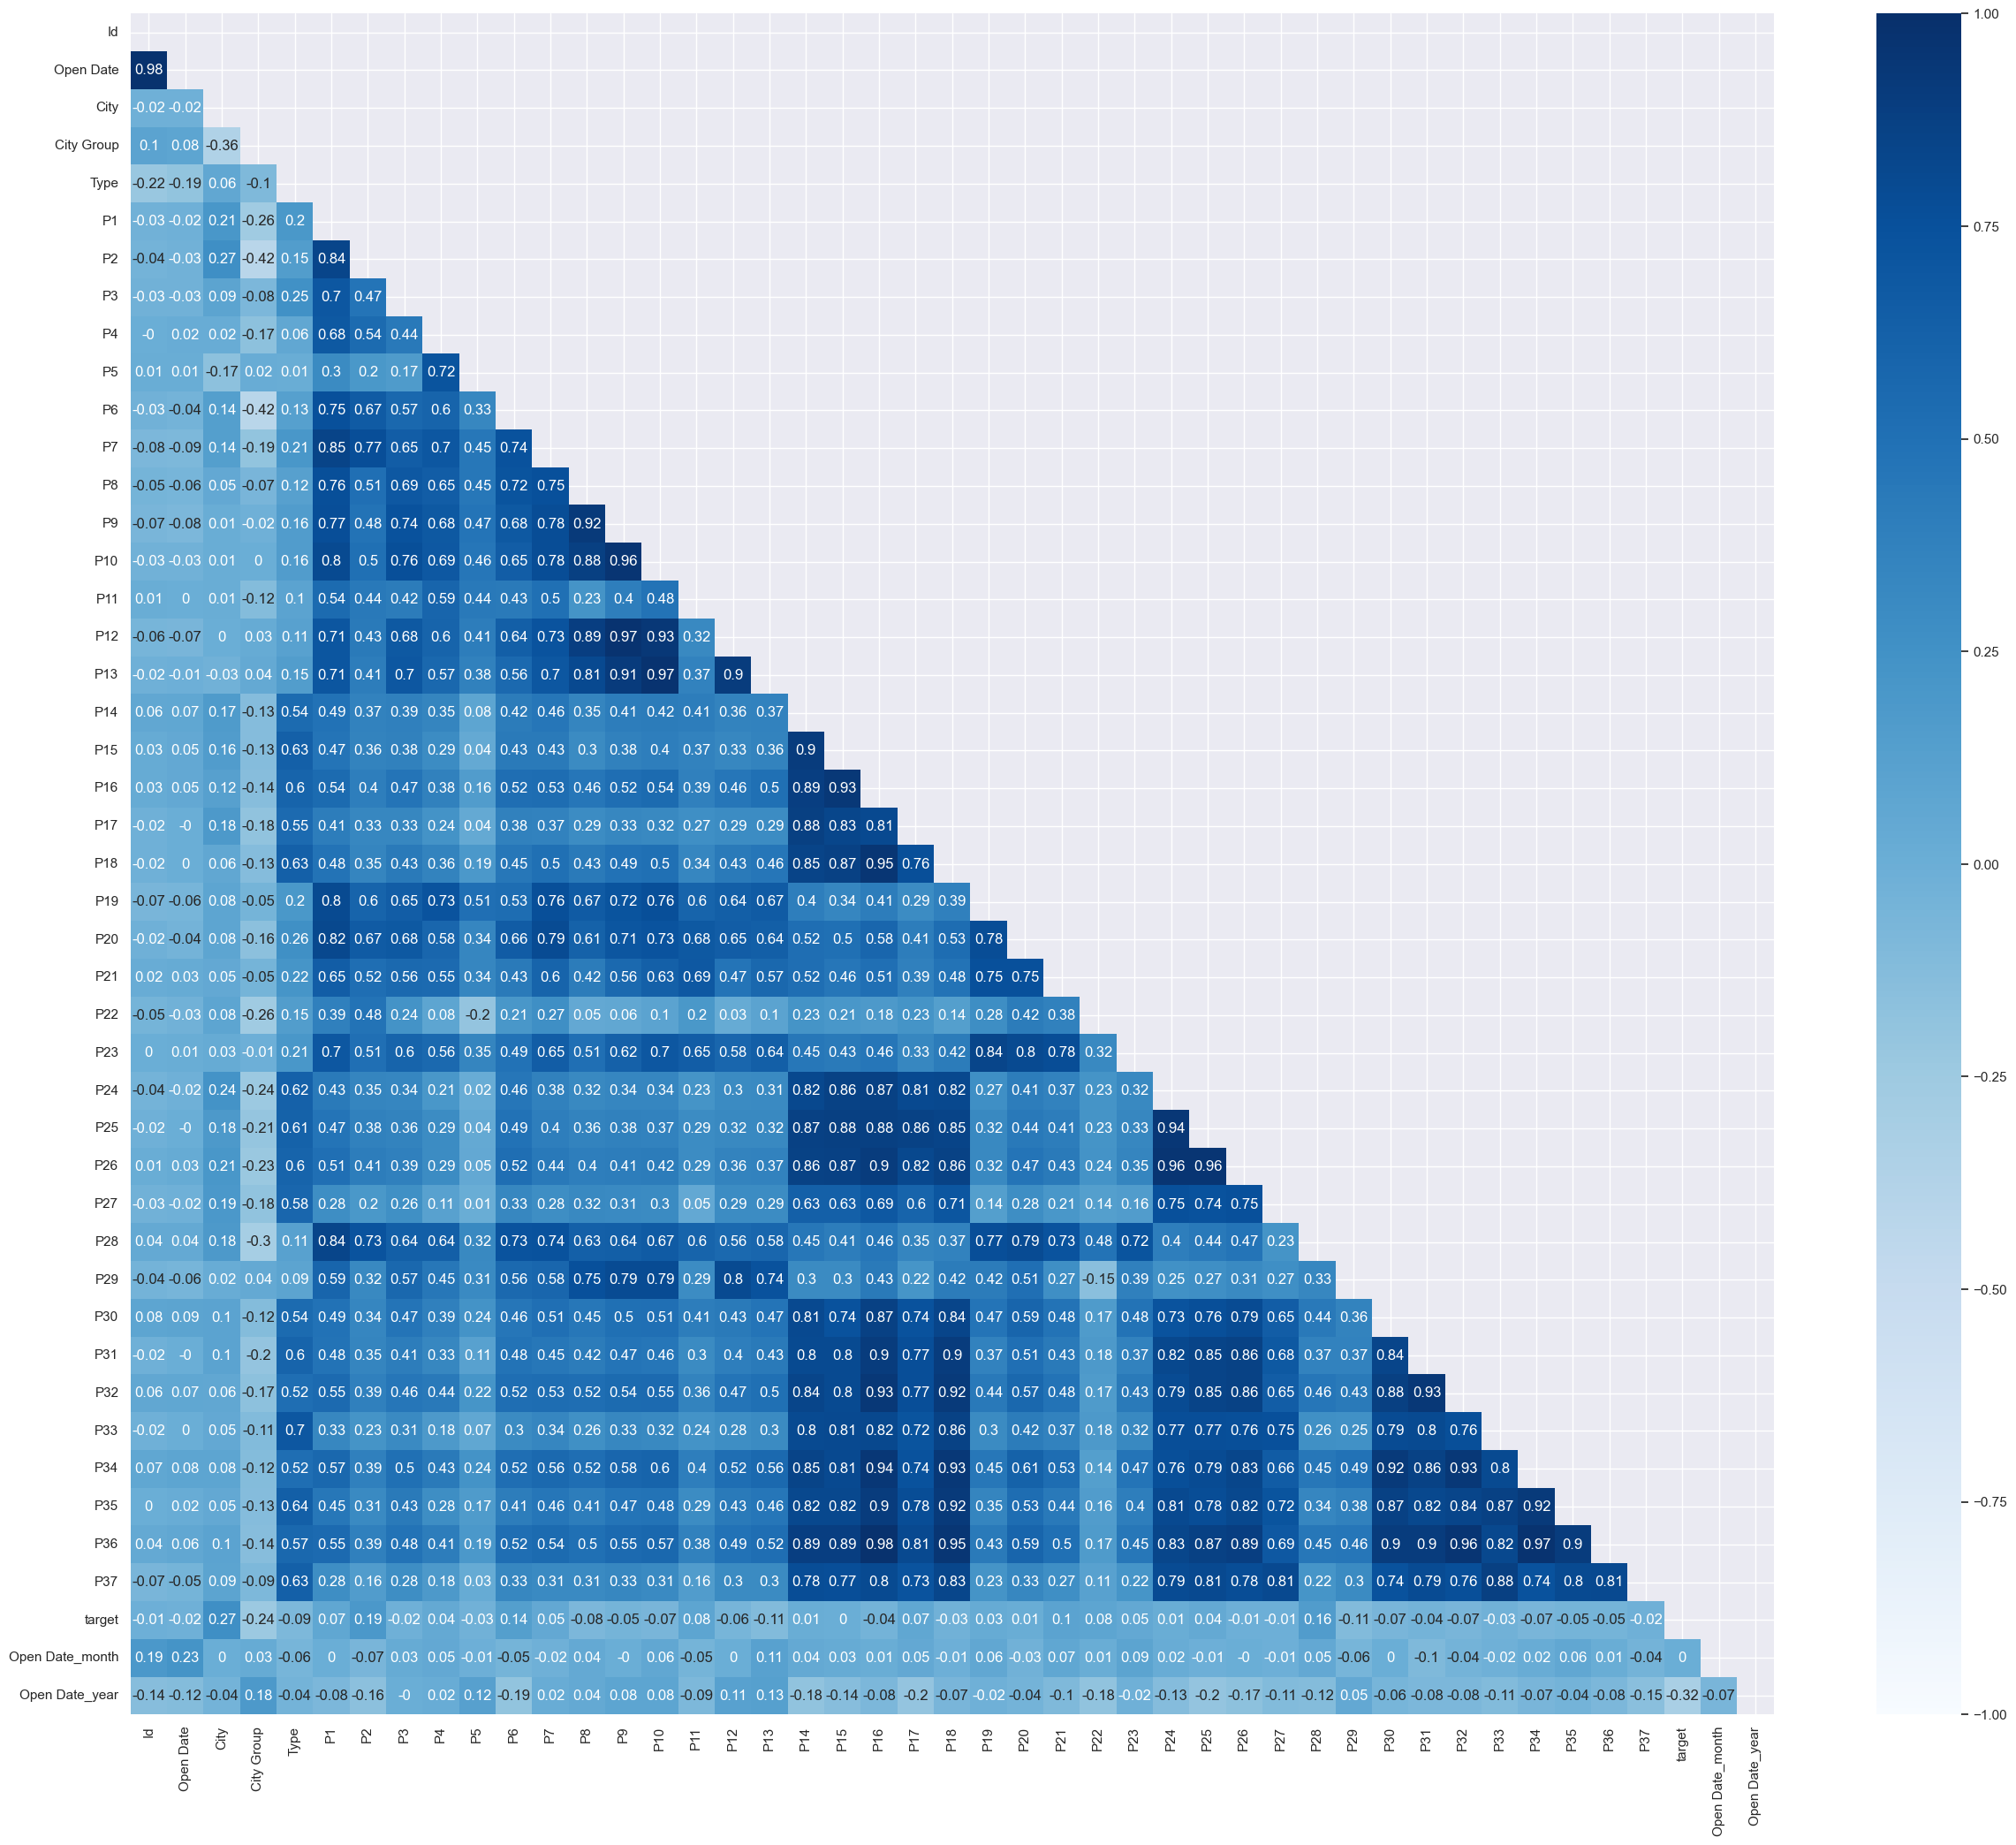

In [186]:
# Correlation Matrix
f = plt.figure(figsize=(30,25))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, 
            center=0, cmap='Blues', mask=mask)
plt.show()

## Strongest Relationships

In [187]:
matrix_corr = df.corr()
matrix_corr = np.round(matrix_corr.unstack(), 2)
strong_rel = matrix_corr[(abs(matrix_corr) >= 0.9) & (abs(matrix_corr) != 1.00)]
strong_rel

Id         Open Date    0.98
Open Date  Id           0.98
P8         P9           0.92
P9         P8           0.92
           P10          0.96
                        ... 
P36        P30          0.90
           P31          0.90
           P32          0.96
           P34          0.97
           P35          0.90
Length: 68, dtype: float64

# 5. Data Visualization

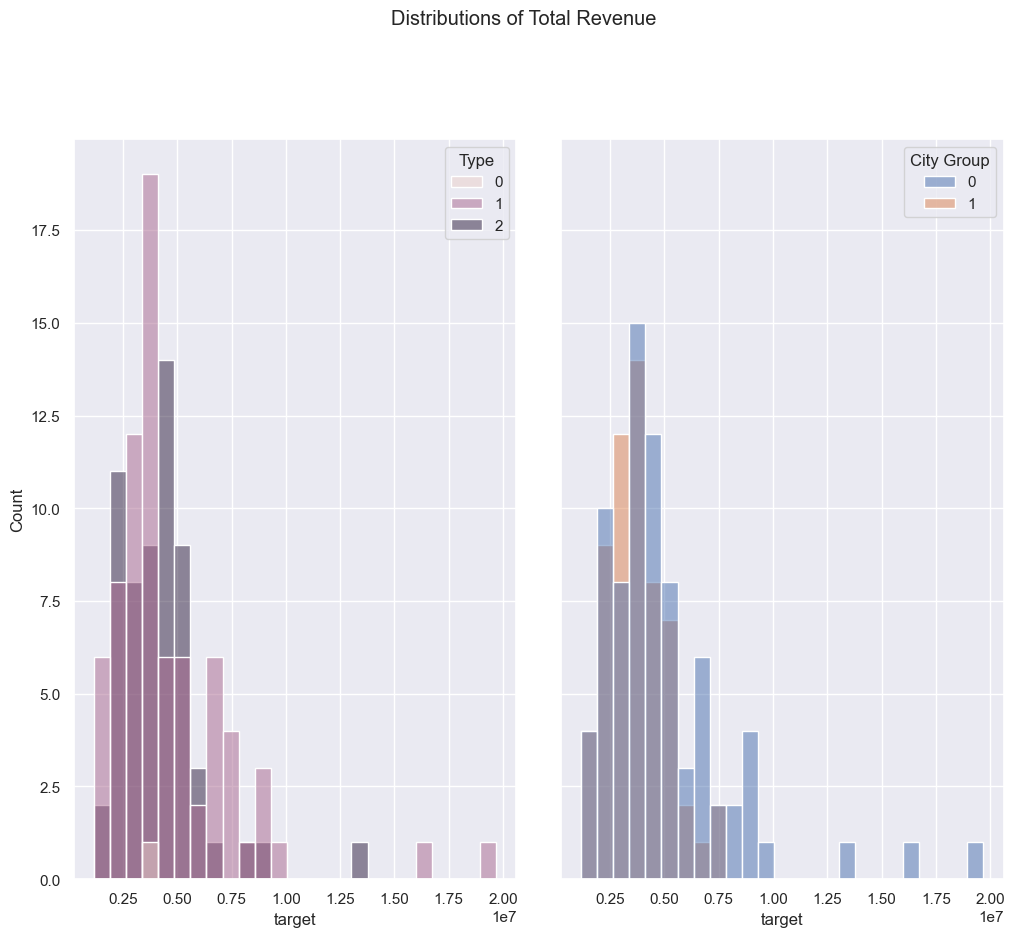

In [188]:
# Distribution of target variable (revenue) by Type and by City Group
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(1, 2, hspace=0.7, wspace=0.1)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Distributions of Total Revenue')
fig.subplots_adjust(top=0.85)

sns.histplot(data=df, x='target', bins=25,hue='Type', ax=ax1)
sns.histplot(data=df, x='target', bins=25,hue='City Group', ax=ax2)

plt.show()

# 6. Models

## Linear Regression 

Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.

Mean Squared Error: 18913396192426.496
R2 Score: -0.5459777852856416


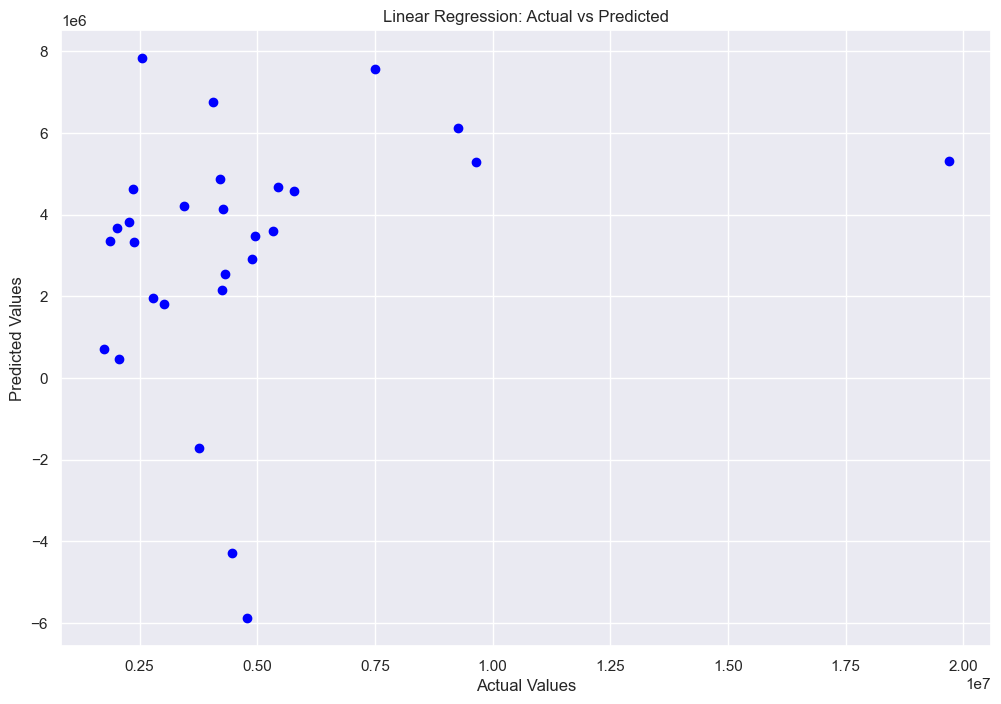

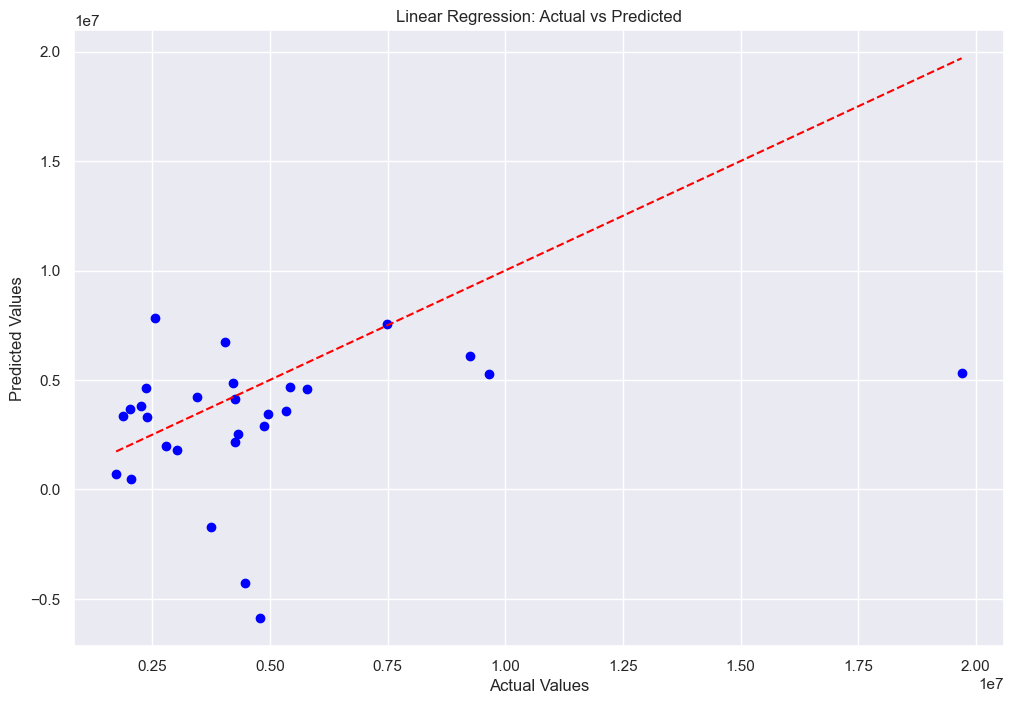

In [189]:
#importing Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
lr = LinearRegression()
lr.fit(X_train, y_train)

#test predictions
y_pred = lr.predict(X_test)

#score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

#Graphs
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Regression line plot
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## KNN  

KNN is a non-parametric, lazy learning algorithm. It is a supervised machine learning algorithm that can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry.

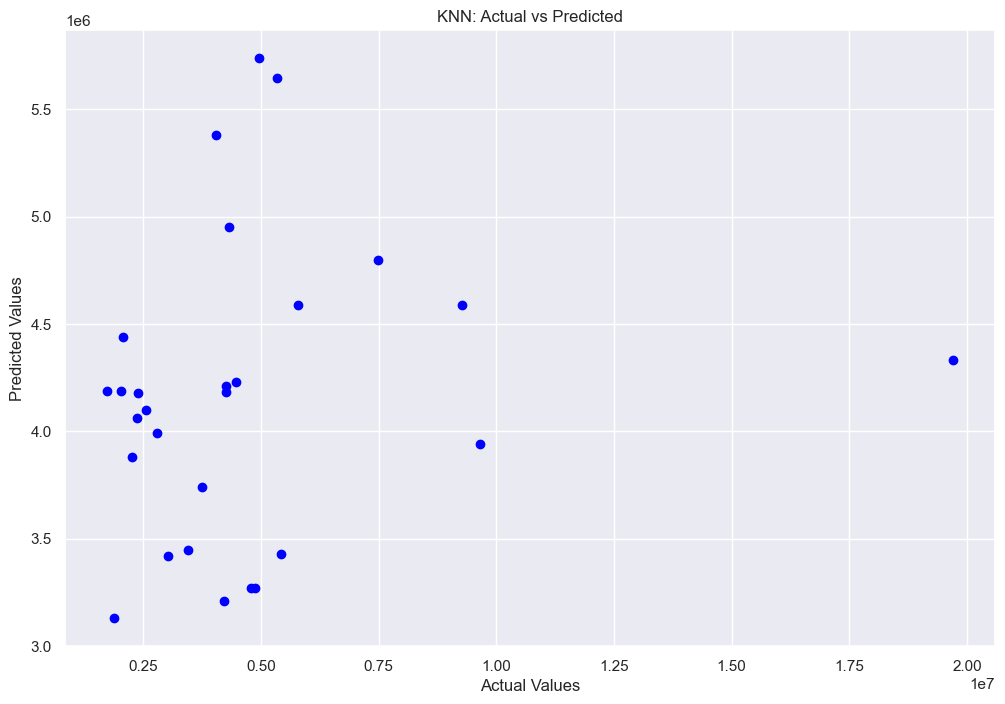

Mean Squared Error : 12239489352486.295
R-squared Score: -0.0004537762372307519


In [190]:
#importing Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor()

#train
knn.fit(X_train, y_train)
#test predictions
y_pred = knn.predict(X_test)
#score
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN: Actual vs Predicted')
plt.show()

print("Mean Squared Error :", mse)
print("R-squared Score:", r2)

## Random Forest

In [191]:
#importing Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
#test predictions
y_pred = rf.predict(X_test)

#score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 10657933689695.033
R2 Score: 0.12882231442315895


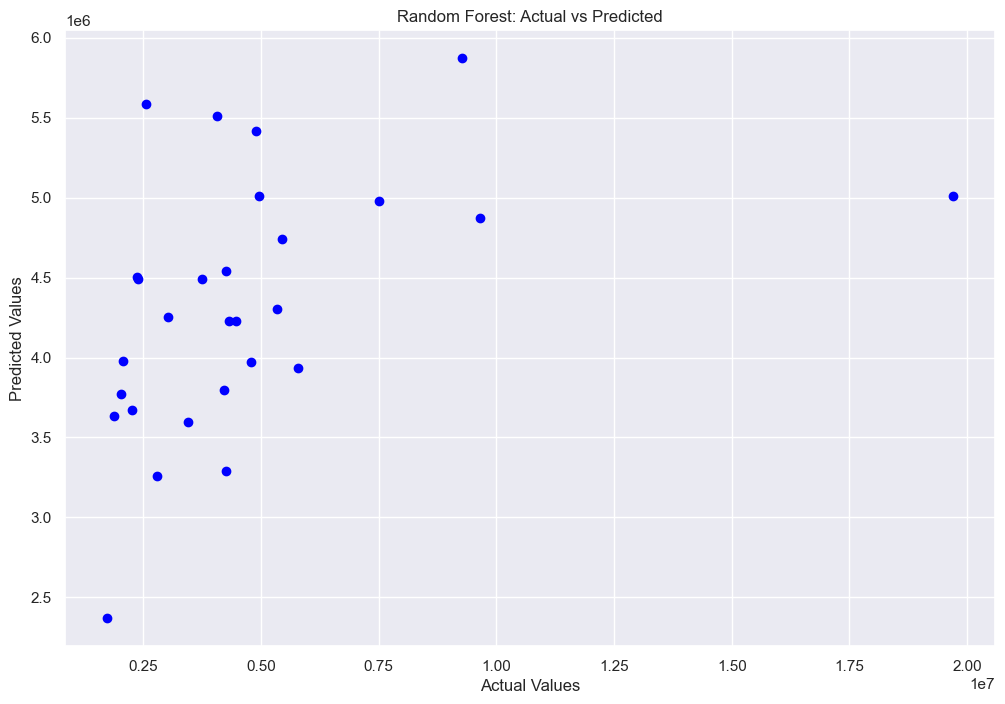

In [192]:
# Scatter plot of actual vs predicted values

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


## LDA  

In [193]:
#importing Model

#Split

#train

#test predictions

#score

## SVM

SVM is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

R-squared score: -0.06388185963040871


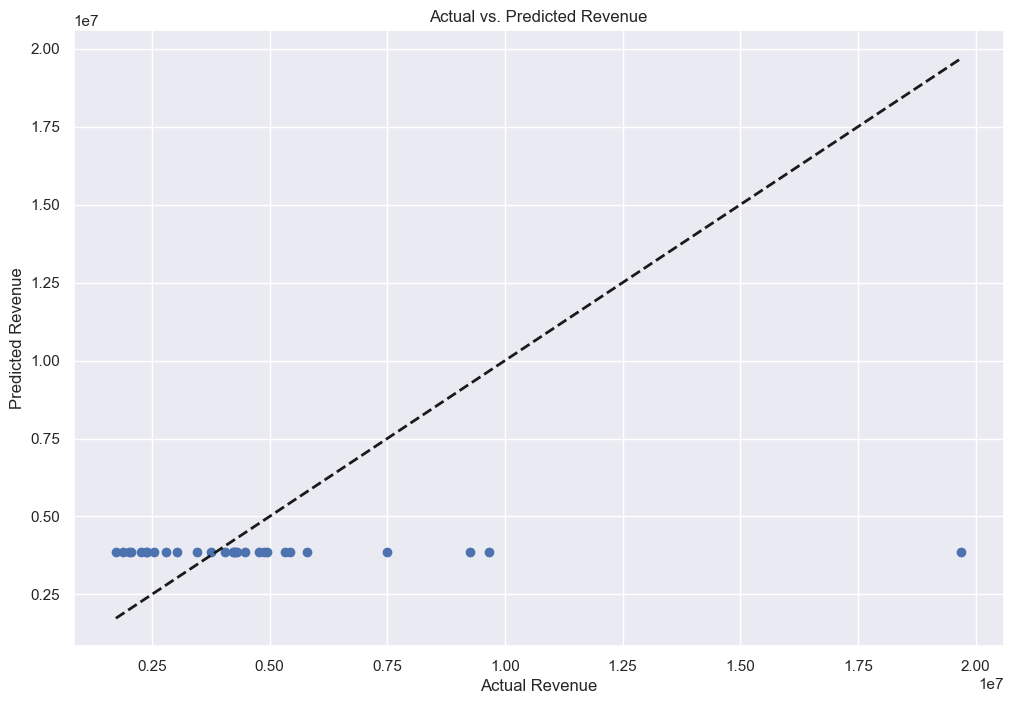

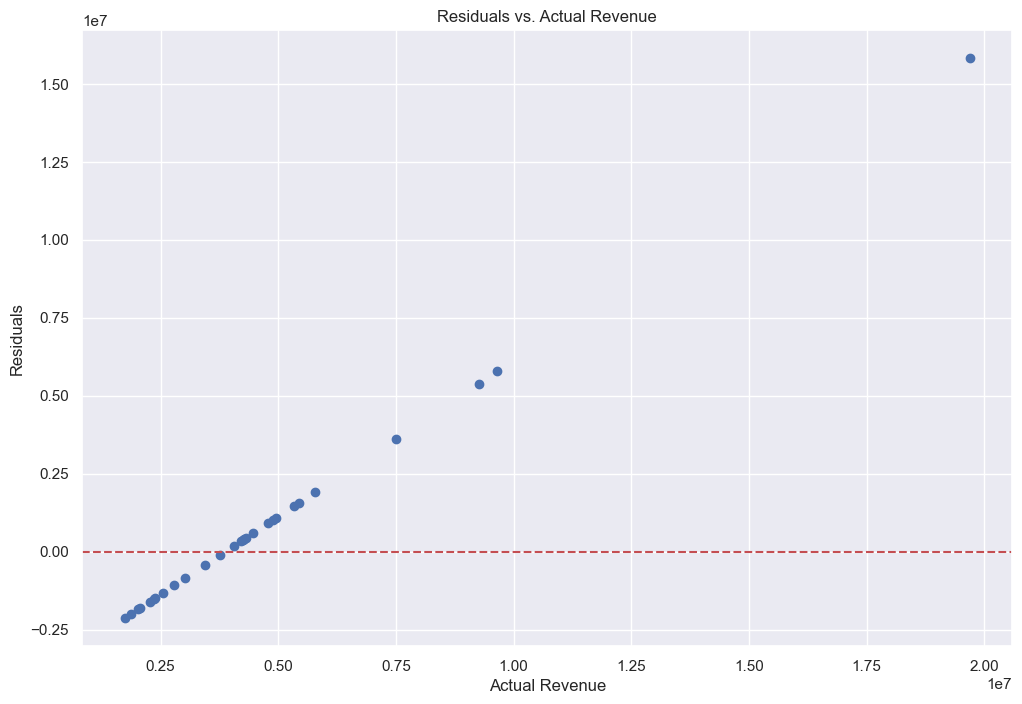

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Select the features for training the SVM model
features = df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
               'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
               'P32', 'P33', 'P34', 'P35', 'P36', 'P37']]

# Select the target variable
target = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVR model
svm = SVR()

# Train the SVR model
svm.fit(X_train_scaled, y_train)

# Evaluate the model
score = svm.score(X_test_scaled, y_test)
print(f"R-squared score: {score}")

import matplotlib.pyplot as plt

# Assuming you have already trained the SVM model and have X_test and y_test available

# Predict the target variable for the test set
y_pred = svm.predict(X_test_scaled)

# Create a scatter plot of the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')

# Show the plot
plt.show()

# Calculate the residuals
residuals = y_test - y_pred

# Create a scatter plot of the residuals against the actual values
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at y=0
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Revenue')

# Show the plot
plt.show()

In this case of SVM we have a very low accuracy score of 0.01. This is due to the fact that the data is not linearly separable.

## Decision Tree

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In this algorithm, we split the population or sample into two or more homogeneous sets (or sub-populations) based on the most significant splitter / differentiator in input variables.

In [195]:
#importing Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Split
X = df.drop('target', axis=1)
y = df['target']

#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#test predictions
y_pred = model.predict(X_test)

#score
score = r2_score(y_test, y_pred)
print("we obtain a score of :", score)

we obtain a score of : 0.1478011706253699


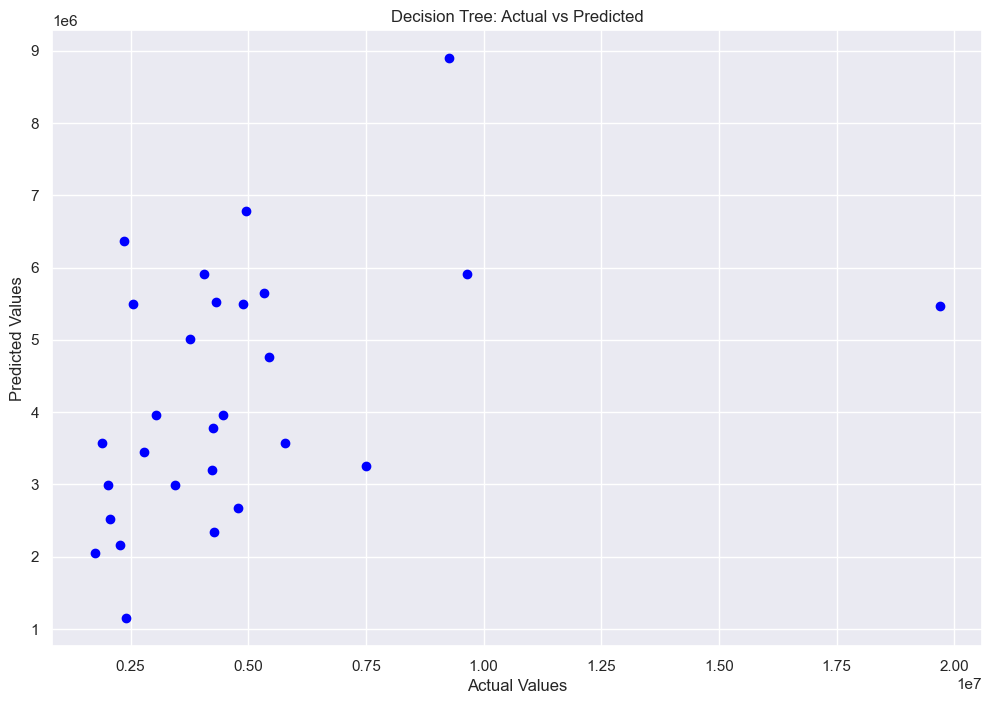

In [196]:
#Graphs
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()


## Naive Bayes 

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [197]:
#importing Model

#Split

#train

#test predictions

#score

## Clusterring

Clustering is an unsupervised learning technique that allows us to group data points into a number of clusters based on their similarity. One of the most common clustering algorithms is K-means clustering. K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

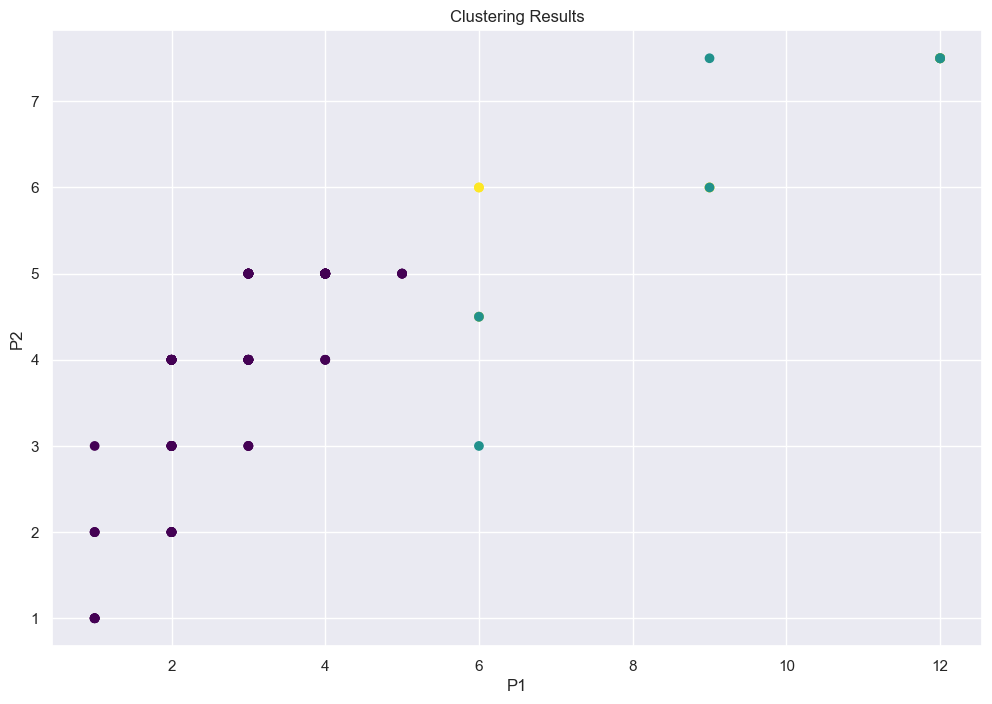

In [198]:
from sklearn.cluster import KMeans

# Select the features you want to use for clustering
features = df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
               'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
               'P32', 'P33', 'P34', 'P35', 'P36', 'P37']]

# Create an instance of the KMeans algorithm
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters you want

# Fit the algorithm to your data
kmeans.fit(features)

# Retrieve the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to your dataframe
df['cluster'] = labels

# Create a scatter plot of the clusters
plt.scatter(df['P1'], df['P2'], c=df['cluster'], cmap='viridis')
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('Clustering Results')

# Show the plot
plt.show()

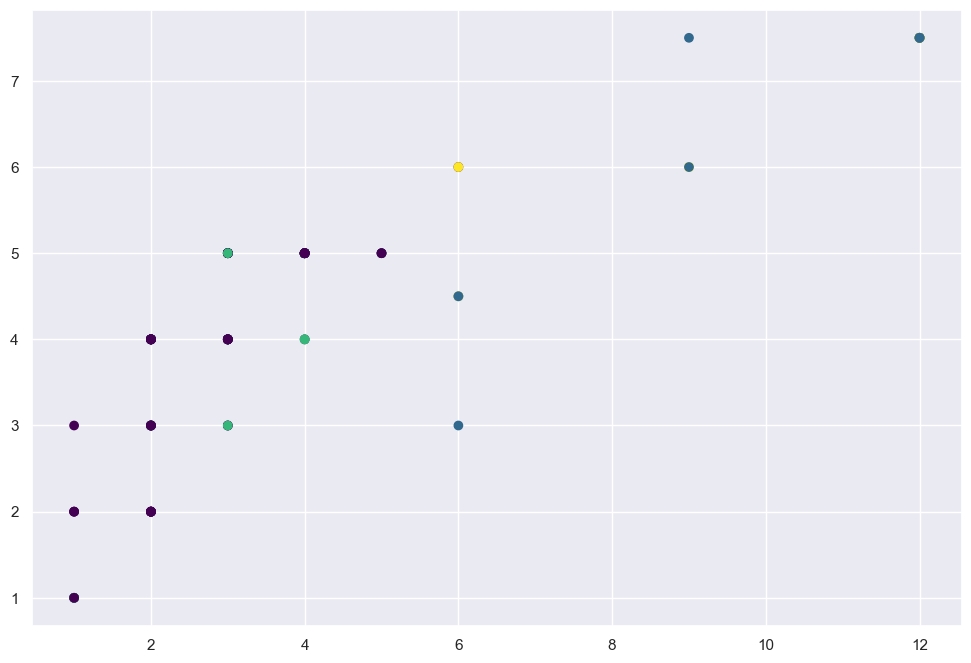

In [199]:
# For 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the algorithm to your data
kmeans.fit(features)

# Retrieve the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to your dataframe
df['cluster'] = labels

# Create a scatter plot of the clusters
plt.scatter(df['P1'], df['P2'], c=df['cluster'], cmap='viridis')

# Show the plot
plt.show()


# 6. Models Evaluation

## Model Comparison

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


def compare_models(data_path):
    # Load the dataset
    df = pd.read_csv(data_path)

    # Split the dataset into features (X) and target (y)
    X = df.drop(['Id', 'Open Date', 'City', 'City Group', 'Type'], axis=1)
    y = df['P37']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the models
    models = [
        LinearRegression(),
        KNeighborsRegressor(),
        LinearDiscriminantAnalysis(),
        SVR(),
        GaussianNB(),
        DecisionTreeRegressor(),
        RandomForestRegressor()
    ]

    # Initialize a dictionary to store the model metrics
    model_metrics = {}

    # Evaluate each model
    for model in models:
        model_name = model.__class__.__name__

        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Predict the target variable for the test set
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Store the metrics in the dictionary
        model_metrics[model_name] = {'MSE': mse, 'MAE': mae}

    # Sort the models based on MSE in ascending order
    sorted_models = sorted(model_metrics.items(), key=lambda x: x[1]['MSE'])

    # Return the sorted models and metrics
    return sorted_models

sorted_models = compare_models('./train.csv')
print(sorted_models)

[('LinearRegression', {'MSE': 1.799047894569325e-19, 'MAE': 2.431661546285007e-10}), ('DecisionTreeRegressor', {'MSE': 0.14285714285714285, 'MAE': 0.07142857142857142}), ('RandomForestRegressor', {'MSE': 0.1764821428571428, 'MAE': 0.08607142857142855}), ('LinearDiscriminantAnalysis', {'MSE': 2.7142857142857144, 'MAE': 0.7857142857142857}), ('KNeighborsRegressor', {'MSE': 4.675714285714286, 'MAE': 1.5642857142857145}), ('SVR', {'MSE': 4.8229541892397725, 'MAE': 1.1403648655406664}), ('GaussianNB', {'MSE': 5.357142857142857, 'MAE': 1.2142857142857142})]


## Model Evaluation

In [1]:
def plot_model_comparison(sorted_models):
    # Extract the model names and metrics for plotting
    model_names = [model[0] for model in sorted_models]
    mses = [model[1]['MSE'] for model in sorted_models]
    maes = [model[1]['MAE'] for model in sorted_models]

    # Plot the MSE and MAE
    x = np.arange(len(model_names))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, mses, width, label='MSE')
    rects2 = ax.bar(x + width/2, maes, width, label='MAE')

    ax.set_ylabel('Error')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=90)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    
    plt.show()
    

data_path = "./train.csv"
sorted_models = compare_models(data_path)
plot_model_comparison(sorted_models)

NameError: name 'compare_models' is not defined